<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Economics/blob/main/Yen_Carry_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 캐리 트레이드(Carry Trade)란?
  - 기본 개념: 캐리 트레이드는 낮은 금리로 차입한 자금을 사용해 더 높은 수익률을 제공하는 자산에 투자하는 전략입니다. 예를 들어, 금리가 낮은 국가의 통화를 빌려 금리가 높은 국가의 자산(예: 채권, 주식, 부동산 등)에 투자하여 금리 차이를 통해 수익을 얻습니다.
  - 수익 구조: 투자자는 낮은 금리와 높은 금리 간의 차이를 통해 수익을 얻습니다. 이 수익은 대출을 받은 통화의 가치가 하락하지 않는 한 안정적으로 발생할 수 있습니다.
2. 엔 캐리 트레이드(Yen Carry Trade)
  - 배경: 일본은 오랫동안 초저금리 정책을 유지해왔습니다. 이로 인해 일본 엔화(JPY)를 저금리로 빌려 다른 나라의 고금리 자산에 투자하는 것이 가능해졌습니다.
  - 전략 설명:
    투자자는 일본에서 엔화를 저금리로 빌려옵니다.
    이 빌린 엔화를 즉시 다른 통화로 환전하여 금리가 높은 다른 국가의 자산에 투자합니다. 예를 들어, 호주 달러(AUD)나 뉴질랜드 달러(NZD)로 환전해 해당 국가의 채권이나 기타 자산에 투자할 수 있습니다.
    투자자는 높은 금리 차익을 통해 수익을 창출하고, 이후 엔화로 다시 환전해 빌린 돈을 상환합니다.
3. 리스크와 한계
  - 환율 변동 위험: 캐리 트레이드는 환율 변동에 취약합니다. 만약 엔화 가치가 갑자기 상승하면, 투자자는 원래의 대출금을 상환할 때 더 많은 자금을 지불해야 하므로 손실이 발생할 수 있습니다.
  - 금리 변동 위험: 금리의 변동은 캐리 트레이드의 수익성에 직접적인 영향을 미칩니다. 일본의 금리가 상승하거나, 투자 대상 국가의 금리가 하락하면 캐리 트레이드의 매력이 감소할 수 있습니다.
  - 글로벌 경제 불안정: 글로벌 경제 상황이 불안정할 때, 투자자들은 위험을 회피하려고 엔화와 같은 안전 자산으로 자금을 이동시킵니다. 이로 인해 엔화가 강세를 보이면, 캐리 트레이드 전략이 큰 손실을 초래할 수 있습니다.
4. 엔 캐리 트레이드의 역사적 맥락
  - 2000년대 초반: 엔 캐리 트레이드는 2000년대 초반에 크게 유행했습니다. 당시 일본의 금리가 매우 낮았고, 다른 국가들(특히 호주, 뉴질랜드 등)은 상대적으로 높은 금리를 제공하고 있었습니다.
  - 2008년 금융위기: 글로벌 금융위기 당시, 투자자들이 위험 자산에서 벗어나면서 엔화는 강세를 보였고, 많은 캐리 트레이드 전략이 큰 손실을 입었습니다. 이 사건은 캐리 트레이드의 위험성을 다시금 환기시키는 계기가 되었습니다.
5. 현황과 전망
  - 현재 상황: 일본은 여전히 초저금리 정책을 유지하고 있지만, 글로벌 경제의 불확실성과 여러 경제적 요인으로 인해 캐리 트레이드는 이전보다 덜 활성화되어 있습니다. 그러나 특정 시장 상황에서 여전히 엔 캐리 트레이드 전략이 사용되고 있습니다.
  - 미래 전망: 글로벌 금리 환경의 변화, 특히 일본의 금리 정책 변화가 캐리 트레이드 전략에 큰 영향을 미칠 것입니다. 일본의 금리가 오를 경우, 캐리 트레이드의 매력이 감소할 수 있습니다.

In [1]:
import yfinance as yf
import pandas as pd

start_date = '2002-04-01'
end_date = '2024-05-01'

exchange_rate_data = yf.download('JPY=X', start=start_date, end=end_date)

exchange_rate_data = exchange_rate_data[['Adj Close']]
exchange_rate_data.columns = ['Exchange_Rate']

exchange_rate_data.index = pd.to_datetime(exchange_rate_data.index)

print(exchange_rate_data.head())


[*********************100%%**********************]  1 of 1 completed

            Exchange_Rate
Date                     
2002-04-01     133.309998
2002-04-02     133.130005
2002-04-03     132.710007
2002-04-04     132.330002
2002-04-05     131.550003


In [2]:
japan_rates_df = pd.read_excel('/content/IR3TIB01JPM156N.xls', sheet_name='FRED Graph') ## 일본 3개월 단기 금리

us_rates_df = pd.read_excel('/content/DGS10 (1).xls', sheet_name='FRED Graph') ## 미국 10년 장기 국채 금리

japan_rates_df['observation_date'] = pd.to_datetime(japan_rates_df['observation_date'])
us_rates_df['observation_date'] = pd.to_datetime(us_rates_df['observation_date'])

japan_rates_df.dropna(inplace=True)
us_rates_df.dropna(inplace=True)

merged_df = pd.merge(japan_rates_df, us_rates_df, on='observation_date', how='inner')

merged_df = pd.merge(merged_df, exchange_rate_data, left_on='observation_date', right_index=True, how='inner')

merged_df.columns = ['Date', 'Japan_3M_Rate', 'US_10Y_Rate', 'Exchange_Rate']

print(merged_df.head())


        Date  Japan_3M_Rate  US_10Y_Rate  Exchange_Rate
0 2002-04-01           0.10         5.44     133.309998
1 2002-05-01           0.08         5.08     127.239998
2 2002-07-01           0.09         4.85     119.769997
3 2002-08-01           0.07         4.47     119.209999
4 2002-10-01           0.08         3.72     122.599998


In [3]:
merged_df['Rate_Difference'] = merged_df['US_10Y_Rate'] - merged_df['Japan_3M_Rate']

# 수익률 계산
merged_df['FX_Change'] = merged_df['Exchange_Rate'].pct_change()  # 환율 변화율 계산
merged_df['Carry_Trade_Return'] = (1 + merged_df['Rate_Difference'] / 100) * (1 + merged_df['FX_Change']) - 1

# 누적 수익률 계산
merged_df['Cumulative_Return'] = (1 + merged_df['Carry_Trade_Return']).cumprod()

print(merged_df.head())


        Date  Japan_3M_Rate  US_10Y_Rate  Exchange_Rate  Rate_Difference  \
0 2002-04-01           0.10         5.44     133.309998             5.34   
1 2002-05-01           0.08         5.08     127.239998             5.00   
2 2002-07-01           0.09         4.85     119.769997             4.76   
3 2002-08-01           0.07         4.47     119.209999             4.40   
4 2002-10-01           0.08         3.72     122.599998             3.64   

   FX_Change  Carry_Trade_Return  Cumulative_Return  
0        NaN                 NaN                NaN  
1  -0.045533            0.002190           1.002190  
2  -0.058708           -0.013902           0.988257  
3  -0.004676            0.039119           1.026917  
4   0.028437            0.065872           1.094562  


In [4]:
print(merged_df)

          Date  Japan_3M_Rate  US_10Y_Rate  Exchange_Rate  Rate_Difference  \
0   2002-04-01          0.100         5.44     133.309998            5.340   
1   2002-05-01          0.080         5.08     127.239998            5.000   
2   2002-07-01          0.090         4.85     119.769997            4.760   
3   2002-08-01          0.070         4.47     119.209999            4.400   
4   2002-10-01          0.080         3.72     122.599998            3.640   
..         ...            ...          ...            ...              ...   
167 2023-11-01          0.024         4.77     151.294006            4.746   
168 2023-12-01          0.052         4.22     147.998993            4.168   
169 2024-02-01          0.027         3.87     146.996002            3.843   
170 2024-03-01          0.109         4.19     150.095001            4.081   
171 2024-04-01          0.109         4.33     151.397995            4.221   

     FX_Change  Carry_Trade_Return  Cumulative_Return  
0      

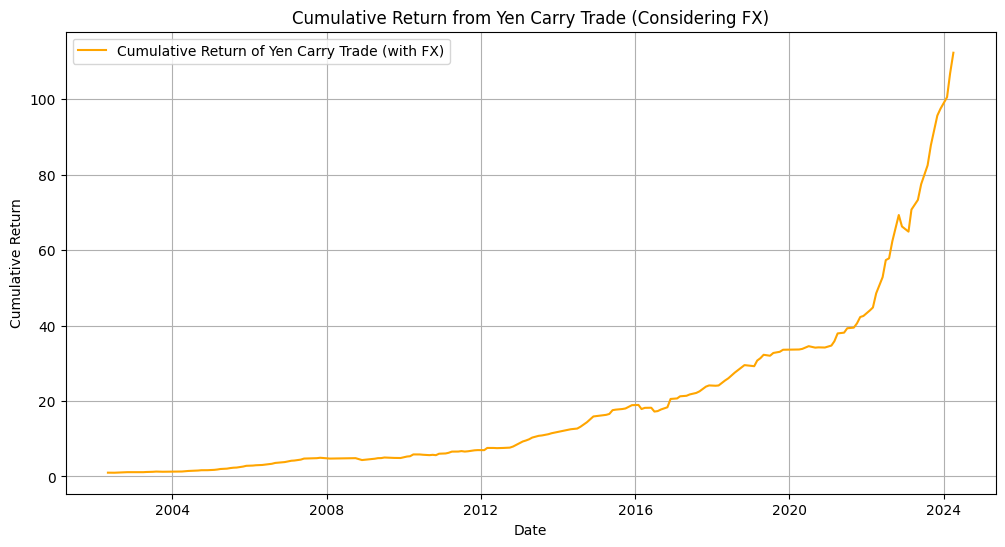

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 환율 변동을 고려한 누적 수익률 그래프
plt.plot(merged_df['Date'], merged_df['Cumulative_Return'], label='Cumulative Return of Yen Carry Trade (with FX)', color='orange')
plt.title('Cumulative Return from Yen Carry Trade (Considering FX)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()



### 그래프 해석:
  - 초기 기간 (2002~2015년): 누적 수익률이 상대적으로 안정적으로 증가하고 있습니다. 이 기간 동안 금리 차이가 비교적 안정적이었고, 환율 변동성도 크게 높지 않았음을 의미할 수 있습니다.

  - 중기 기간 (2016~2020년): 이 시기에는 누적 수익률의 변화가 더 뚜렷하게 나타나고 있습니다. 이는 아마도 금리 차이나 환율 변동성의 증가로 인해 캐리 트레이드의 수익률이 변동했음을 나타낼 수 있습니다.

  - 최근 기간 (2020~2024년): 이 기간에 누적 수익률이 급격히 상승하는 것을 볼 수 있습니다. 이는 금리 차이의 확대, 환율 변동, 또는 경제적 사건(예: 팬데믹, 중앙은행의 금리 정책 변화)과 관련이 있을 수 있습니다.

##글로벌 경제 지표를 활용한 리스크 평가

In [12]:
import pandas as pd
import yfinance as yf

# 글로벌 경제 지표 데이터 가져오기
vix_data = yf.download('^VIX', start='2002-01-01', end='2024-08-20')
dxy_data = yf.download('DX-Y.NYB', start='2002-01-01', end='2024-08-20')

vix_data = vix_data[['Adj Close']]
dxy_data = dxy_data[['Adj Close']]

merged_df = pd.merge(merged_df, vix_data, left_on='Date', right_index=True, how='left', suffixes=('', '_VIX'))
merged_df = pd.merge(merged_df, dxy_data, left_on='Date', right_index=True, how='left', suffixes=('', '_DXY'))

print(merged_df.columns)





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Index(['Date', 'Japan_3M_Rate', 'US_10Y_Rate', 'Exchange_Rate',
       'Rate_Difference', 'Carry_Trade_Return', 'Cumulative_Return',
       'Adj Close_VIX', 'Adj Close', 'Adj Close_DXY'],
      dtype='object')


In [13]:
merged_df = merged_df[['Date', 'Japan_3M_Rate', 'US_10Y_Rate', 'Exchange_Rate',
                       'Rate_Difference', 'Carry_Trade_Return', 'Cumulative_Return',
                       'Adj Close_VIX', 'Adj Close_DXY']]

merged_df.columns = ['Date', 'Japan_3M_Rate', 'US_10Y_Rate', 'Exchange_Rate',
                     'Rate_Difference', 'Carry_Trade_Return', 'Cumulative_Return',
                     'VIX', 'Dollar_Index']

print(merged_df.head())

        Date  Japan_3M_Rate  US_10Y_Rate  Exchange_Rate  Rate_Difference  \
0 2002-04-01           0.10         5.44     133.309998             5.34   
1 2002-05-01           0.08         5.08     127.239998             5.00   
2 2002-07-01           0.09         4.85     119.769997             4.76   
3 2002-08-01           0.07         4.47     119.209999             4.40   
4 2002-10-01           0.08         3.72     122.599998             3.64   

   Carry_Trade_Return  Cumulative_Return        VIX  Dollar_Index  
0                 NaN                NaN  18.730000    117.769997  
1            0.002190           1.002190  20.059999    114.540001  
2           -0.013902           0.988257  27.110001    106.510002  
3            0.039119           1.026917  36.950001    107.019997  
4            0.065872           1.094562  34.119999    107.070000  


In [10]:
print(merged_df.head())
merged_df.drop('Adj Close_DXY', axis=1, inplace=True)

        Date  Japan_3M_Rate  US_10Y_Rate  Exchange_Rate  Rate_Difference  \
0 2002-04-01           0.10         5.44     133.309998             5.34   
1 2002-05-01           0.08         5.08     127.239998             5.00   
2 2002-07-01           0.09         4.85     119.769997             4.76   
3 2002-08-01           0.07         4.47     119.209999             4.40   
4 2002-10-01           0.08         3.72     122.599998             3.64   

   Carry_Trade_Return  Cumulative_Return  Adj Close_VIX  Adj Close_DXY  \
0                 NaN                NaN      18.730000     117.769997   
1            0.002190           1.002190      20.059999     114.540001   
2           -0.013902           0.988257      27.110001     106.510002   
3            0.039119           1.026917      36.950001     107.019997   
4            0.065872           1.094562      34.119999     107.070000   

   Adj Close_DXY  
0     117.769997  
1     114.540001  
2     106.510002  
3     107.019997  
4  

In [11]:
print(merged_df.head())

        Date  Japan_3M_Rate  US_10Y_Rate  Exchange_Rate  Rate_Difference  \
0 2002-04-01           0.10         5.44     133.309998             5.34   
1 2002-05-01           0.08         5.08     127.239998             5.00   
2 2002-07-01           0.09         4.85     119.769997             4.76   
3 2002-08-01           0.07         4.47     119.209999             4.40   
4 2002-10-01           0.08         3.72     122.599998             3.64   

   Carry_Trade_Return  Cumulative_Return  Adj Close_VIX  
0                 NaN                NaN      18.730000  
1            0.002190           1.002190      20.059999  
2           -0.013902           0.988257      27.110001  
3            0.039119           1.026917      36.950001  
4            0.065872           1.094562      34.119999  


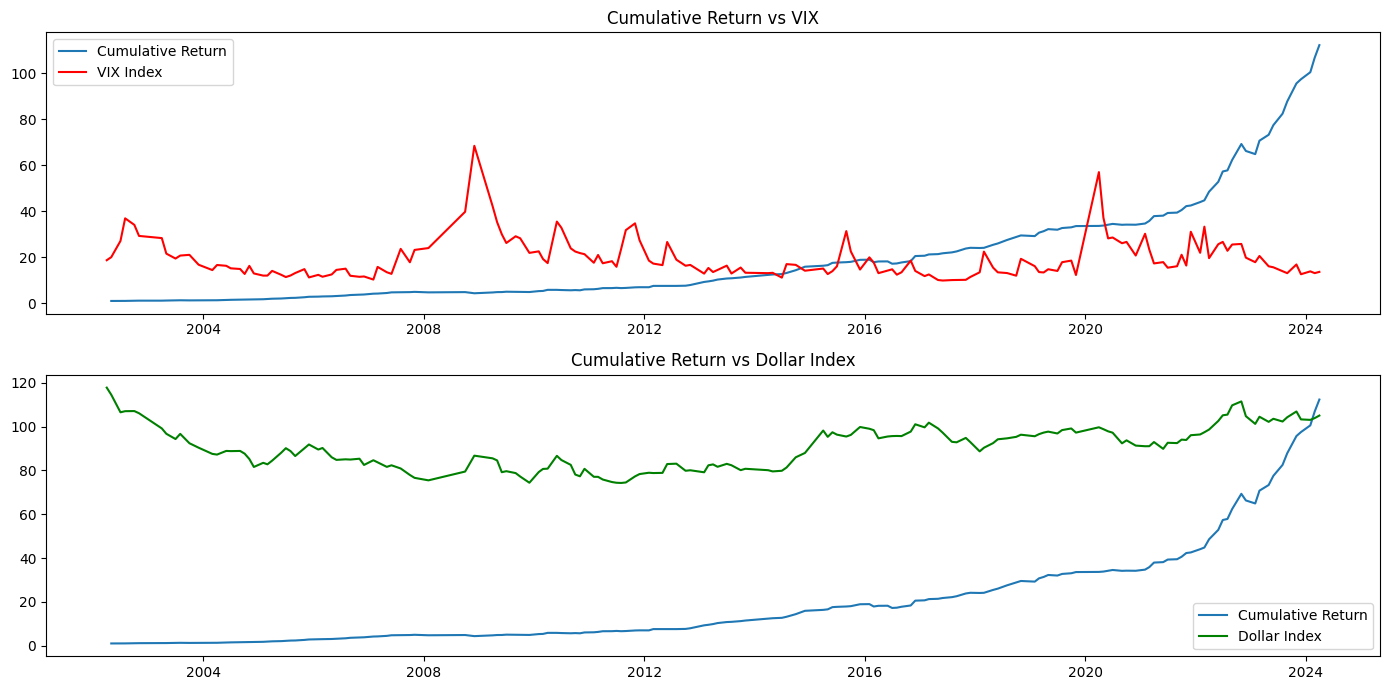

In [14]:
# 리스크 평가: 변동성과 달러 지수에 따른 캐리 트레이드 수익률 분석
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# 캐리 트레이드 수익률과 VIX 비교
plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['Cumulative_Return'], label='Cumulative Return')
plt.plot(merged_df['Date'], merged_df['VIX'], label='VIX Index', color='red')
plt.title('Cumulative Return vs VIX')
plt.legend()

# 캐리 트레이드 수익률과 Dollar Index 비교
plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['Cumulative_Return'], label='Cumulative Return')
plt.plot(merged_df['Date'], merged_df['Dollar_Index'], label='Dollar Index', color='green')
plt.title('Cumulative Return vs Dollar Index')
plt.legend()

plt.tight_layout()
plt.show()


###그래프 해석:
  - Cumulative Return vs VIX (상단 그래프):

    - **VIX 지수(빨간색)**는 시장의 변동성을 나타내며, 특히 금융 시장의 불확실성이 높아질 때 상승합니다.
    - **누적 수익률(파란색)**은 엔 캐리 트레이드 전략의 성과를 보여줍니다.
    - VIX 지수가 급격히 상승하는 시기(예: 2008년 금융위기, 2020년 팬데믹 초기)에는 누적 수익률의 상승이 둔화되거나 거의 변동이 없음을 알 수 있습니다. 이는 변동성이 높은 시기에 캐리 트레이드 전략이 더 큰 리스크에 노출된다는 것을 의미할 수 있습니다.

  - Cumulative Return vs Dollar Index (하단 그래프):

    - **달러 인덱스(녹색)**는 미국 달러의 강도를 나타내는 지표로, 주요 통화 대비 달러의 상대적 가치를 측정합니다.
    - **누적 수익률(파란색)**은 역시 엔 캐리 트레이드의 성과를 나타냅니다.
    - 달러 인덱스가 상승할 때(즉, 달러가 강세를 보일 때) 누적 수익률도 함께 상승하는 경향이 있음을 볼 수 있습니다. 이는 달러 강세가 엔 캐리 트레이드의 수익률에 긍정적인 영향을 미쳤을 가능성을 시사합니다.